In [22]:
import pandas
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = 'data-preprocessed-berlabel-fix.csv'

try:
    df = pandas.read_csv(file_path)

    # Menampilkan beberapa baris pertama data
    print("Head of the dataset:")
    print(df.head())

    # Menampilkan informasi dasar tentang dataset (tipe data, non-null counts)
    print("\nInfo of the dataset:")
    df.info()

    # Menampilkan statistik deskriptif untuk kolom numerik
    print("\nDescription of the dataset:")
    print(df.describe())

    # Menampilkan jumlah nilai yang hilang per kolom
    print("\nMissing values per column:")
    print(df.isnull().sum())

    # Visualisasi distribusi untuk kolom numerik (contoh: menggunakan histogram)
    df.hist(figsize=(10, 8))
    plt.tight_layout()
    plt.show()

    # Visualisasi boxplot untuk kolom numerik (untuk melihat outlier)
    df.boxplot(figsize=(10, 8))
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and make sure the drive is mounted correctly.")
except Exception as e:
    print(f"An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Head of the dataset:
    tgl-laporan                            title  \
0  Jumat, 08:23                   Evakuasi Tawon   
1  Jumat, 08:20                 ular masuk dapur   
2  Jumat, 08:18                 ular masuk rumah   
3  Jumat, 08:15  Kunci tertinggal di dalam mobil   
4  Jumat, 08:12       Evakuasi Ular Sawo Kembang   

                                                link  \
0  https://www.lapor.go.id/laporan/detil/evakuasi...   
1  https://www.lapor.go.id/laporan/detil/ular-mas...   
2  https://www.lapor.go.id/laporan/detil/ular-mas...   
3  https://www.lapor.go.id/laporan/detil/kunci-te...   
4  https://www.lapor.go.id/laporan/detil/evakuasi...   

                                             content  \
0  pernohonan evakuasi tawon atap rumah salah rum...   
1  laporan salah warga kelurahan mondokan kecamat...   
2  laporan salah warga kelurahan

##  **Penjelasan Tiap Tahapan Kode**

### 1. **Mount Google Drive**

```python
from google.colab import drive
drive.mount('/content/drive')
```

* Menghubungkan Google Drive ke Google Colab agar Anda bisa mengakses file dari drive.
* Folder Drive akan muncul di path: `/content/drive/MyDrive/...`.

### 2. **Membaca File CSV**

```python
file_path = '/content/drive/MyDrive/Capstone Project DBS/Salinan dataset_preprocessed_berlabel.csv'
df = pandas.read_csv(file_path)
```

* Membaca file CSV ke dalam DataFrame `df`.
* Lokasi file spesifik berada di folder proyek Anda di Google Drive.

### 3. **Menampilkan 5 Baris Pertama**

```python
print(df.head())
```

* Untuk melihat contoh data awal.
* Digunakan untuk memahami struktur dan isi data.

### 4. **Menampilkan Informasi Dataset**

```python
df.info()
```

* Menampilkan:

  * Jumlah entri
  * Nama dan jumlah kolom
  * Jumlah nilai yang tidak null
  * Tipe data setiap kolom

### 5. **Statistik Deskriptif**

```python
df.describe()
```

* Memberikan statistik deskriptif hanya untuk kolom **tipe object** karena semua kolom bertipe `object`.
* Karena tidak ada kolom numerik, statistik seperti `mean`, `std` tidak tersedia.

### 6. **Cek Missing Values**

```python
df.isnull().sum()
```

* Menghitung jumlah data kosong (`NaN`) di setiap kolom.
* Berguna untuk preprocessing sebelum modeling.

### 7. **Visualisasi Histogram**

```python
df.hist(figsize=(10, 8))
```

* Akan **gagal** karena tidak ada kolom bertipe numerik atau datetime.
* Histogram hanya dapat dibuat untuk data bertipe numerik.

### 8. **Visualisasi Boxplot**

```python
df.boxplot(figsize=(10, 8))
```

* Sama seperti histogram, ini juga akan gagal karena tidak ada kolom numerik.

## **Penjelasan Output Dataset**

### `df.head()`

```text
0  Evakuasi/Penyelamatan Hewan  Bahaya Rendah  menengah
1  Evakuasi/Penyelamatan Hewan  Bahaya Rendah  menengah
2  Evakuasi/Penyelamatan Hewan  Bahaya Rendah  menengah
3  Penyelamatan Non Hewan & Bantuan Teknis  Bahaya Rendah  rendah
4  Evakuasi/Penyelamatan Hewan  Bahaya Rendah  menengah
```

* Menunjukkan bahwa data berisi **jenis laporan**, **tingkat bahaya**, dan **tingkat urgensi**.
* Kasus terbanyak adalah "Evakuasi/Penyelamatan Hewan" dengan bahaya rendah dan urgensi menengah.

### `df.info()`

```text
716 entries, 7 columns, mostly complete
```

* Total 716 laporan.
* 7 kolom: semuanya bertipe objek.
* Hanya kolom `link` dan `jenis_laporan` yang mengandung nilai kosong (`null`).

### `df.describe()`

```text
- `tgl-laporan` memiliki 488 nilai unik (banyak tanggal berbeda).
- `title`: "evakuasi ular" muncul paling sering (57 kali).
- `jenis_laporan`: 4 kategori, paling umum: "Evakuasi/Penyelamatan Hewan" (342 kasus).
- `tingkat_bahaya`: 3 kategori, paling umum: "Bahaya Rendah" (484 kasus).
- `tingkat_urgensi`: 3 kategori, paling umum: "menengah" (483 kasus).
```

### `df.isnull().sum()`

```text
link             3 missing
jenis_laporan    2 missing
```

* Harus ditangani (misalnya dihapus atau diisi) sebelum training model.


# Visualisasi

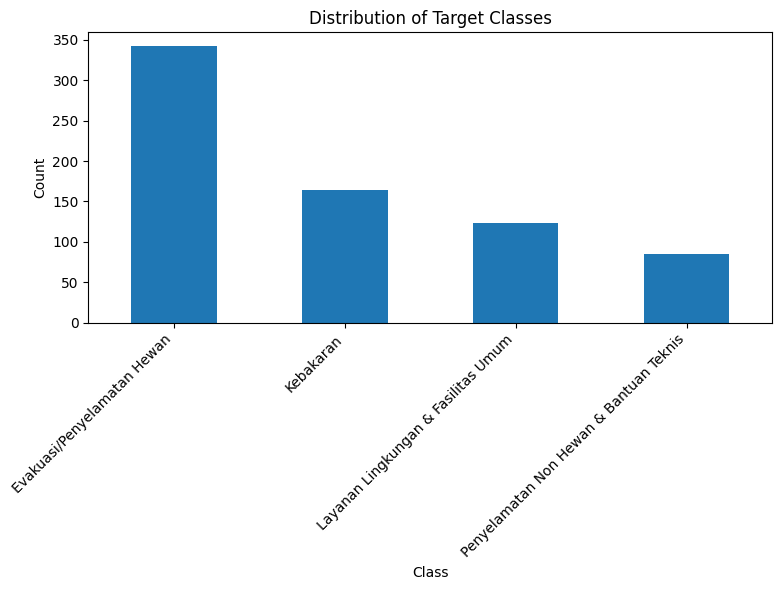

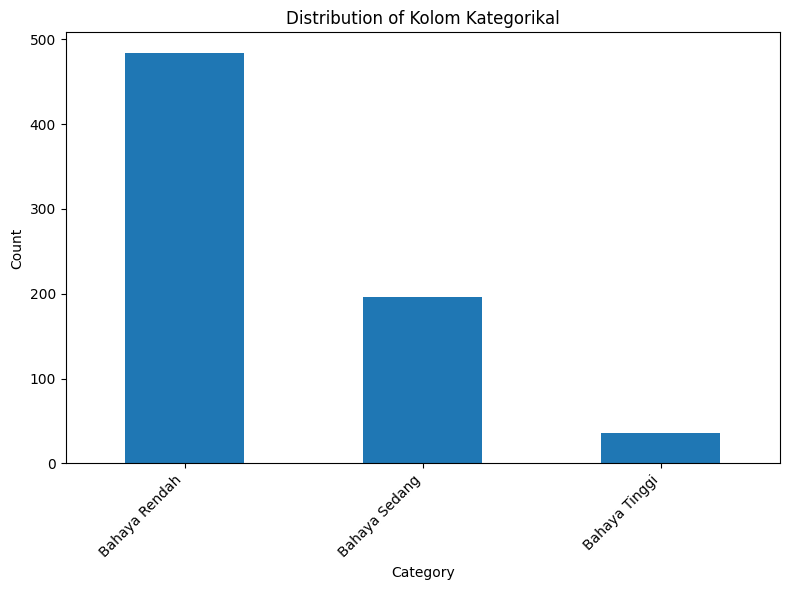

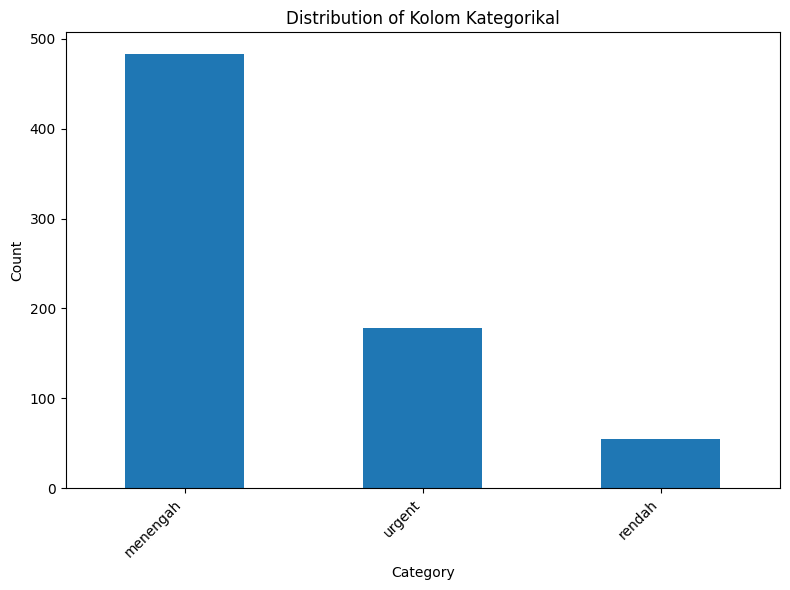

In [24]:
if 'jenis_laporan' in df.columns:
    plt.figure(figsize=(8, 6))
    df['jenis_laporan'].value_counts().plot(kind='bar')
    plt.title('Distribution of Target Classes')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

if 'tingkat_bahaya' in df.columns:
    plt.figure(figsize=(8, 6))
    df['tingkat_bahaya'].value_counts().plot(kind='bar')
    plt.title('Distribution of Kolom Kategorikal')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

if 'tingkat_urgensi' in df.columns:
    plt.figure(figsize=(8, 6))
    df['tingkat_urgensi'].value_counts().plot(kind='bar')
    plt.title('Distribution of Kolom Kategorikal')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### 1. **Visualisasi Distribusi Kelas Target (`jenis_laporan`)**

```python
if 'jenis_laporan' in df.columns:
    plt.figure(figsize=(8, 6))
    df['jenis_laporan'].value_counts().plot(kind='bar')
    plt.title('Distribution of Target Classes')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
```

**Penjelasan:**

* Mengecek apakah kolom `jenis_laporan` tersedia.
* Menghitung jumlah data untuk setiap jenis laporan (kategori target).
* Membuat grafik batang (bar chart) untuk menunjukkan jumlah kasus dari masing-masing kategori.

---

### 2. **Visualisasi Distribusi `tingkat_bahaya`**

```python
if 'tingkat_bahaya' in df.columns:
    plt.figure(figsize=(8, 6))
    df['tingkat_bahaya'].value_counts().plot(kind='bar')
    plt.title('Distribution of Kolom Kategorikal')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
```

**Penjelasan:**

* Mengecek apakah kolom `tingkat_bahaya` tersedia.
* Menghitung jumlah masing-masing kategori tingkat bahaya.
* Menampilkan grafik batang untuk memperlihatkan seberapa sering setiap kategori muncul.

---

### 3. **Visualisasi Distribusi `tingkat_urgensi`**

```python
if 'tingkat_urgensi' in df.columns:
    plt.figure(figsize=(8, 6))
    df['tingkat_urgensi'].value_counts().plot(kind='bar')
    plt.title('Distribution of Kolom Kategorikal')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
```

**Penjelasan:**

* Mirip seperti `tingkat_bahaya`, namun kali ini untuk kolom `tingkat_urgensi`.

---

## **Penjelasan Gambar dan Outputnya**

### Gambar 1: Distribusi `jenis_laporan` (Target Classes)

**Interpretasi**:

* Kategori **"Evakuasi/Penyelamatan Hewan"** mendominasi dataset dengan jumlah kasus terbanyak (\~340).
* Diikuti oleh **"Kebakaran"**, lalu **"Layanan Lingkungan & Fasilitas Umum"**, dan paling sedikit **"Penyelamatan Non Hewan & Bantuan Teknis"** (\~80).
* Ini menunjukkan distribusi target tidak seimbang (imbalanced data), yang penting dipertimbangkan dalam pemodelan klasifikasi.

---

### Gambar 2: Distribusi `tingkat_bahaya`

**Interpretasi**:

* Mayoritas laporan memiliki **"Bahaya Rendah"** (\~480).
* Disusul oleh **"Bahaya Sedang"** (\~200) dan hanya sedikit yang **"Bahaya Tinggi"** (\~35).
* Ini bisa menunjukkan bahwa sebagian besar laporan tidak bersifat darurat tinggi, yang juga bisa memberi insight penting untuk penentuan prioritas tanggapan.

##  **Gambar 3: Distribusi `tingkat_urgensi`**

Terdapat tiga kategori urgensi:

1. **Menengah** – Sekitar **480 laporan**
2. **Urgent** – Sekitar **180 laporan**
3. **Rendah** – Sekitar **50 laporan**




# Word Cloud

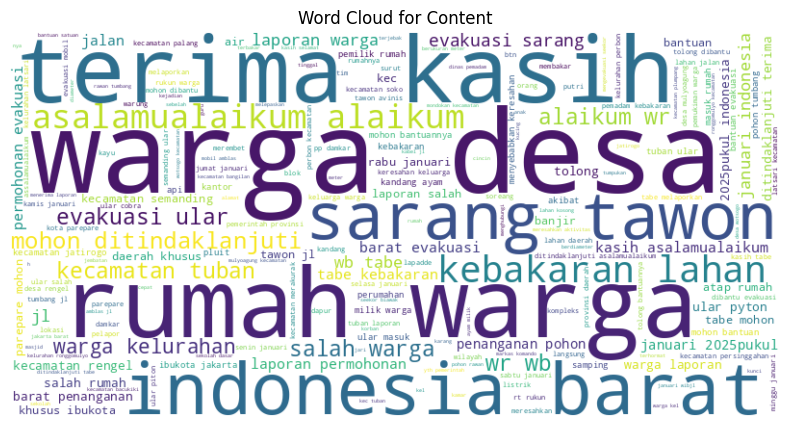

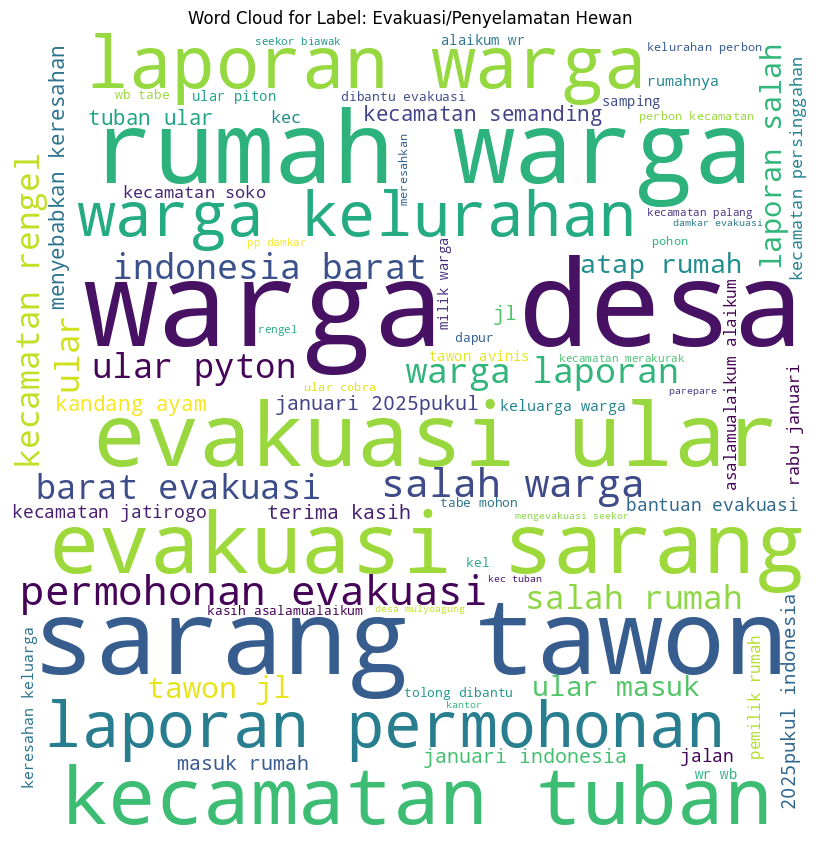

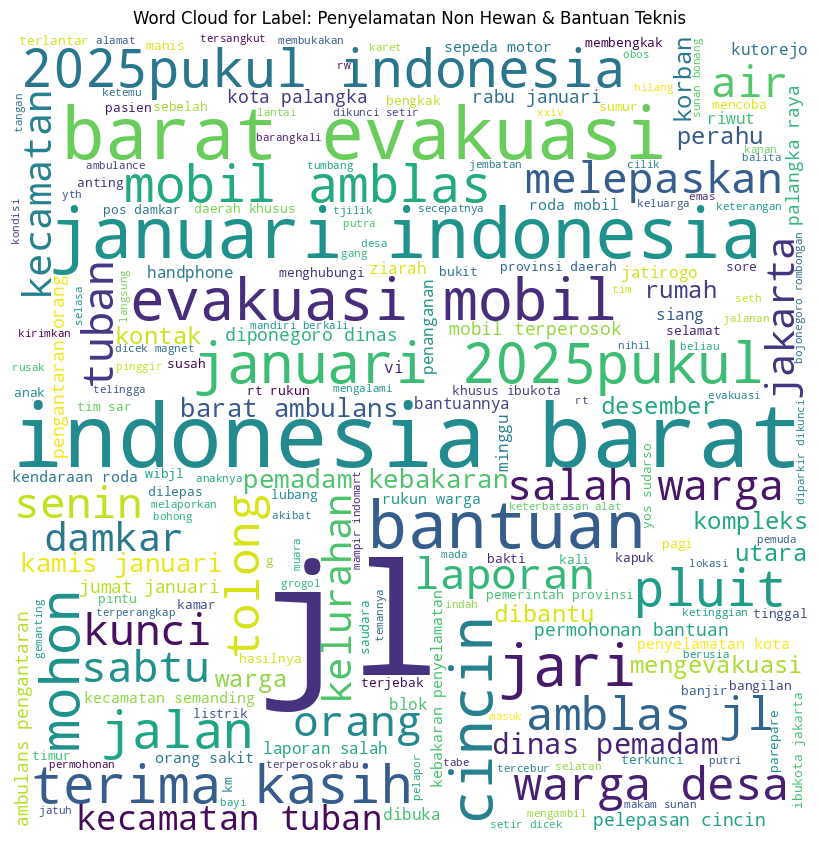

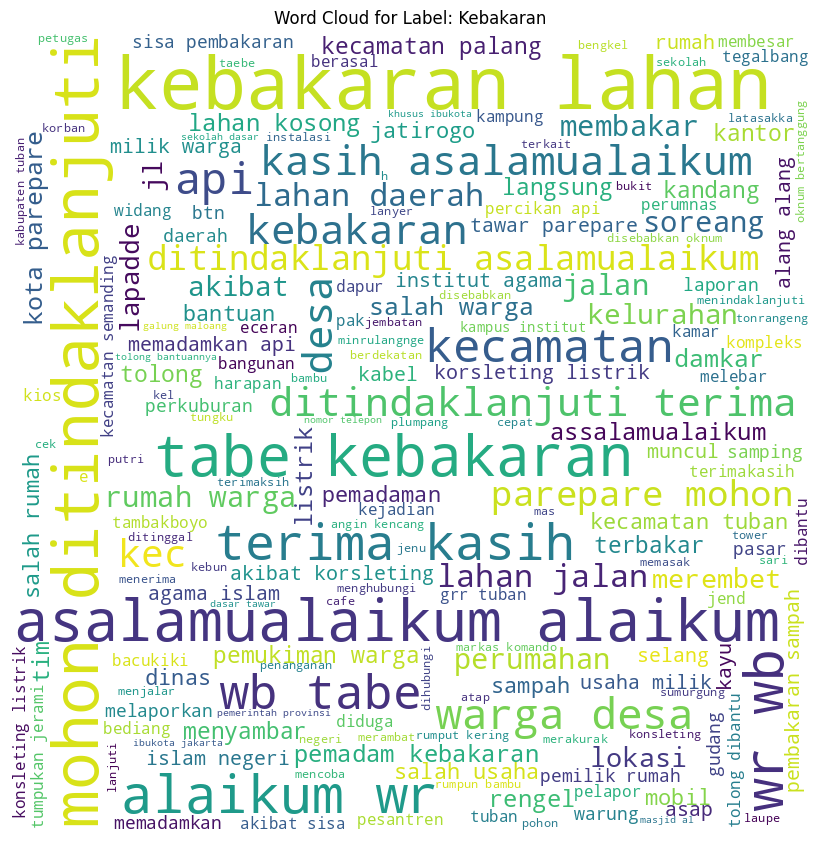

No text data found for label: nan. Skipping Word Cloud generation.


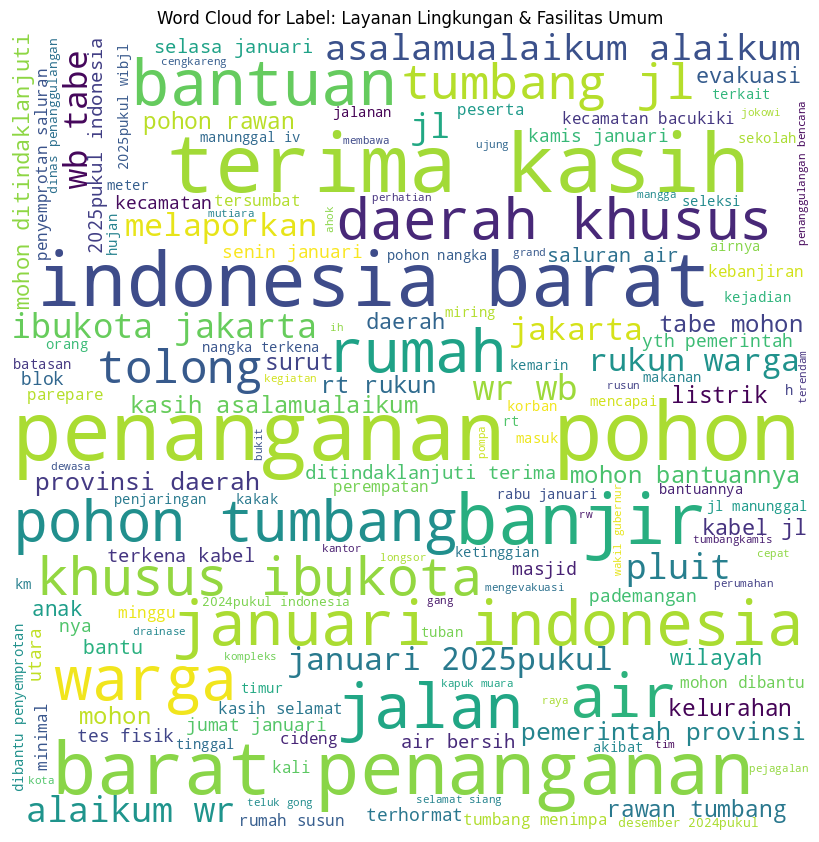

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


if 'content' in df.columns:
    text = " ".join(review for review in df['content'].astype(str))

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud for Content')
    plt.show()

if 'content' in df.columns and 'jenis_laporan' in df.columns:
  labels = df['jenis_laporan'].unique()

  for label in labels:
    text_for_label = df[df['jenis_laporan'] == label]['content'].dropna().str.cat(sep=' ')

    if text_for_label:
        # Create WordCloud object
        wordcloud = WordCloud(width = 800, height = 800,
                              background_color ='white',
                              min_font_size = 10).generate(text_for_label)

        # plot the WordCloud image
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.title(f'Word Cloud for Label: {label}')
        plt.show()
    else:
        print(f"No text data found for label: {label}. Skipping Word Cloud generation.")

else:
  print("Columns 'content' or 'jenis_laporan' not found in the DataFrame.")

# Word Cloud

```python
wordcloud = WordCloud(...).generate(text)
```


##  **Penjelasan Word Cloud**

Gambar ini adalah **visualisasi frekuensi kata** yang muncul di kolom `content` dari DataFrame.


###  **Makna dari Gambar**

* **Ukuran kata** menunjukkan **frekuensi kemunculannya** dalam teks:

  * Semakin besar ukuran sebuah kata, semakin sering kata tersebut muncul.
  * Sebaliknya, kata yang kecil berarti lebih jarang disebutkan.


###  **Beberapa Kata yang Paling Sering Muncul:**

| Kata                                  | Makna Umum                                                            |
| ------------------------------------- | --------------------------------------------------------------------- |
| `terima kasih`                        | Ungkapan penghargaan (biasa di akhir laporan atau permintaan bantuan) |
| `warga`, `rumah`, `desa`              | Menunjukkan konteks lokal, laporan dari masyarakat                    |
| `evakuasi`, `ular`, `sarang`, `tawon` | Permintaan penanganan gangguan hewan                                  |
| `kebakaran`, `lahan`                  | Masalah yang sering dilaporkan (bencana atau kecelakaan)              |
| `indonesia barat`                     | Lokasi atau wilayah yang disebutkan dalam laporan                     |
| `assalamualaikum`, `wr`, `wb`         | Salam pembuka umum dalam laporan masyarakat                           |


###  **Manfaat Word Cloud Ini:**

* **Identifikasi Tema Umum**:

  * Terlihat bahwa laporan didominasi oleh kata-kata seperti *permohonan bantuan*, *evakuasi hewan*, dan *kejadian kebakaran*.
* **Memahami Pola Bahasa Pengguna**:

  * Banyak laporan diawali atau diakhiri dengan salam dan ucapan terima kasih.
* **Menentukan Fokus Utama Analisis**:

  * Bisa dijadikan dasar untuk analisis lebih lanjut seperti klasifikasi jenis laporan atau prioritas penanganan.

